# Homework #1

In [ ]:
from cv2.gapi import BGR2RGB
# homework1 --> do not modify/remove this first line and do not add anything before this line
# do not change function name / variable name
# make sure that this block can successfully run on its own without error

# import library below
import cv2
import numpy as np


def homework1_1(image_grayscale):
    # input -> image_grayscale - type -> np.ndarray, size of - (height, width)
    # output -> image_grayscale - type -> np.ndarray, size of - (height, width)

    # TO DO - Implement transformation based on the contrast stretching graph

    filtered_image = np.zeros_like(image_grayscale)

    def pixelVal(pix, r1, s1, r2, s2):
        if (0 <= pix and pix <= r1):
            return (s1 / r1)*pix
        elif (r1 < pix and pix <= r2):
            return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
        else:
            return ((255 - s2)/(255 - r2)) * (pix - r2) + s2

    (x,y) = image_grayscale.shape

    r1 = 56
    r2 = 169
    s1 = 0
    s2 = 255

    for x1 in range(x):
        for y1 in range(y):
            filtered_image[x1,y1] = pixelVal(image_grayscale[x1,y1], r1, s1, r2, s2)

    return filtered_image


def homework1_2(rgbimage):
    # input -> rgbimage - type -> np.ndarray, size of - (height, width, 3)
    # output -> filtered_image - type -> np.ndarray, size of - (height, width, 3)

    # TO DO - Design your own filter

    filtered_image = rgbimage.copy()

    (w,h,d) = filtered_image.shape
    # print(filtered_image.shape)

    for x in range(w):
        for y in range(h):
            if(filtered_image[x,y,0] < filtered_image[x,y,1]*1.2 or filtered_image[x,y,0] < filtered_image[x,y,2]*1.2):
                filtered_image[x,y] = (np.dot(filtered_image[x,y],[0.2989, 0.5870, 0.1140]))//1.5
            else:
                filtered_image[x,y] = np.power(filtered_image[x,y] / 255.0, 0.8) * 255.0
                filtered_image[x,y] = filtered_image[x,y].astype(np.uint8)


    return filtered_image

In [8]:
# fill in  {___Fill____} below
import cv2
import numpy as np
import matplotlib.pyplot as plt

def homework1_4(rgbImage):
    # Convert the image to grayscale
    grayImg = cv2.cvtColor(rgbImage, cv2.COLOR_BGR2GRAY)

    # 4.1 Use the median filter to smooth the image
    smoothed_img = cv2.medianBlur(grayImg, 5)

    # 4.2 Make ROI
    # Create an interesting area
    mark = np.ones((smoothed_img.shape[0], smoothed_img.shape[1]), dtype=np.uint8) * 255
    # Set the coordinates of the rectangle
    start_point = (300, 275)
    end_point = (735, 655)

    # Draw a black square at the center
    cv2.rectangle(mark, start_point, end_point, (0), -1)
    # Mark the area in the image
    mark_ROI = cv2.bitwise_or(smoothed_img, mark)

    # 4.3 Use Gray Level slicing
    Gray_Level_img = mark_ROI.copy()
    Gray_Level_img[(mark_ROI >= 223)] = 255
    Gray_Level_img[(mark_ROI < 223)] = 0

    # Picture show Row1
    plt.figure(figsize=(20, 20))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(rgbImage, cv2.COLOR_BGR2RGB))
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(smoothed_img, cmap='gray')
    plt.title('Image after smoothing')
    plt.axis('off')

    # Picture show Row2
    plt.figure(figsize=(10, 8))
    plt.subplot(2, 2, 1)
    plt.imshow(mark_ROI, cmap='gray')
    plt.title('Mark ROI Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(Gray_Level_img, cmap='gray')
    plt.title('Segmentation with thresholding')
    plt.axis('off')

    plt.show()


# Test your functions

In [ ]:
!wget https://drive.google.com/uc?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe -O kitty.jpg
!wget https://drive.google.com/uc?id=1mIO58Oat2rxLg-c82eN2TLH8sTucQJGI -O noisy_ct.jpg
!wget https://drive.google.com/uc?id=1Se88tbVyh_7yI3dnCq8sLgwg_RFroXdw -O therocksus.jpg
!wget https://drive.google.com/uc?id=12mGj-tiTkNqdly0mgSY4U6CF1kkRFiJ1 -O eggheadguy.jpg

--2023-09-04 17:01:44--  https://drive.google.com/uc?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe
Resolving drive.google.com (drive.google.com)... 172.217.212.102, 172.217.212.113, 172.217.212.101, ...
Connecting to drive.google.com (drive.google.com)|172.217.212.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ihai60q2fsqhh2fm0rm7bpq83s1ejt2d/1693846875000/10800959494545164832/*/1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe?uuid=70480138-e4e1-4a01-a40e-fa5a1d9fa320 [following]
--2023-09-04 17:01:44--  https://doc-0s-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ihai60q2fsqhh2fm0rm7bpq83s1ejt2d/1693846875000/10800959494545164832/*/1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe?uuid=70480138-e4e1-4a01-a40e-fa5a1d9fa320
Resolving doc-0s-2o-docs.googleusercontent.com (doc-0s-2o-docs.googleusercontent.com)... 64.233.182.132, 2607:f8b0:4001:c0a::84
Connecting to do

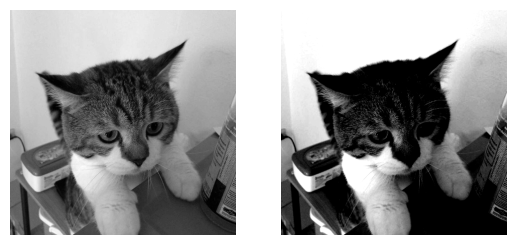

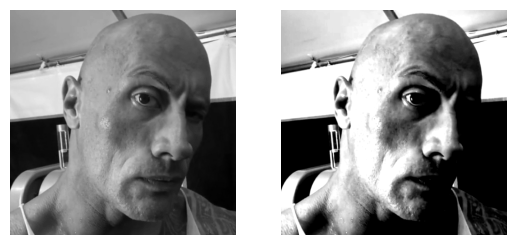

In [ ]:
# test your function
import matplotlib.pyplot as plt
import cv2

img1 = cv2.imread("kitty.jpg")
img_gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img_hw1_1 = homework1_1(img_gray1)
plt.subplot(1,2,1)
plt.axis(False)
plt.imshow(img_gray1,cmap = 'gray')
plt.subplot(1,2,2)
plt.axis(False)
plt.imshow(img_hw1_1,cmap = 'gray')
plt.show()

img2 = cv2.imread("therocksus.jpg")
img_gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
img_hw1_2 = homework1_1(img_gray2)
plt.subplot(1,2,1)
plt.axis(False)
plt.imshow(img_gray2,cmap = 'gray')
plt.subplot(1,2,2)
plt.axis(False)
plt.imshow(img_hw1_2,cmap = 'gray')
plt.show()


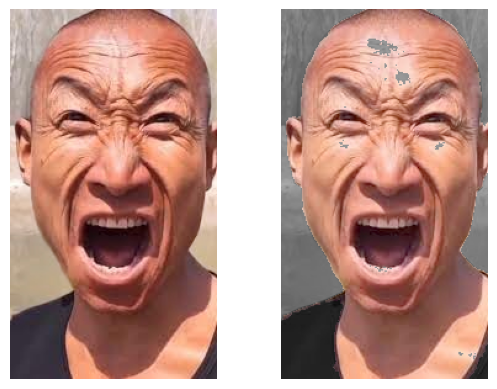

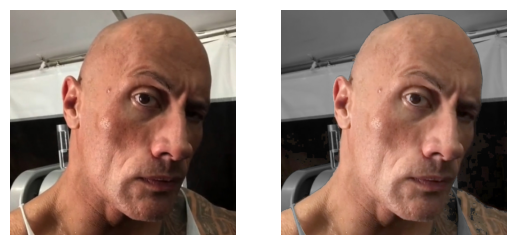

In [ ]:
img1 = cv2.imread("eggheadguy.jpg")
img2 = cv2.imread("therocksus.jpg")

rgbimg1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
rgbimg2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

img_hw2_1 = homework1_2(rgbimg1)
img_hw2_2 = homework1_2(rgbimg2)

plt.subplot(1,2,1)
plt.axis(False)
plt.imshow(rgbimg1)
plt.subplot(1,2,2)
plt.axis(False)
plt.imshow(img_hw2_1)
plt.show()

plt.subplot(1,2,1)
plt.axis(False)
plt.imshow(rgbimg2)
plt.subplot(1,2,2)
plt.axis(False)
plt.imshow(img_hw2_2)
plt.show()

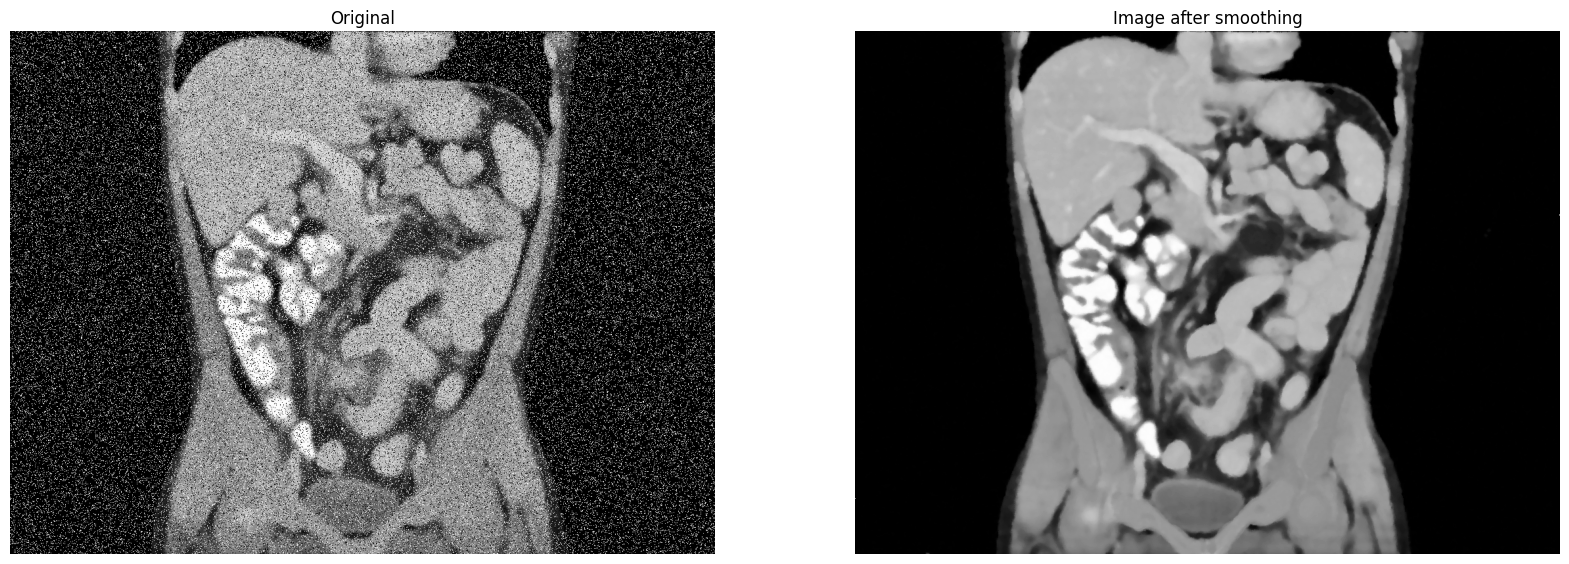

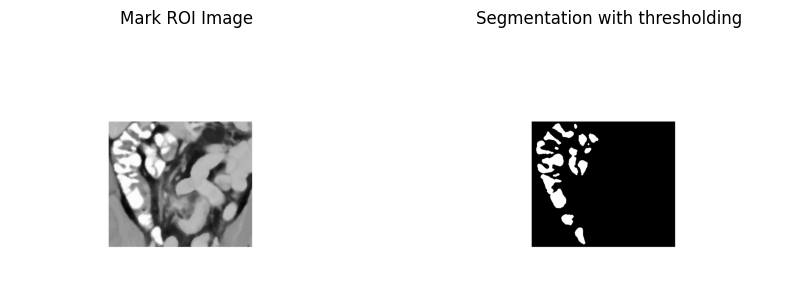

In [9]:
img14 = cv2.imread("noisy_ct.jpg")
homework1_4(img14)